# Upper-bound Analysis

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.spatial import distance

pd.options.display.float_format = '{:,.3f}'.format

In [25]:
base_dir = "../trained_models/BagOfTricks/1000val/full/"
def load_data(train, test, fname, valtest=None) :
    if valtest == None :
        fpath = base_dir + "{}/eval/best/{}/{}.txt".format(train, test, fname)
    else :
        fpath = base_dir + "{}/val/{}/best/{}/{}.txt".format(train, valtest, test, fname)

    return np.loadtxt(fpath).astype(np.int)

train = "autoattack"
test = "pgd"

y_original = load_data(train, test, "Y_original", 1000)
y_original_pred = load_data(train, test, "Y_original_pred", 1000)
y_adv = load_data(train, test, "Y_adv", 1000)
y_adv_pred = load_data(train, test, "Y_adv_pred", 1000)

In [26]:
def get_robust_data(train, test, valtest=None):
    y_adv = load_data(train, test, "Y_adv", valtest)
    y_adv_pred = load_data(train, test, "Y_adv_pred", valtest)
    return y_adv, y_adv_pred

train = "pgd"
test = "autoattack"
y_adv, y_adv_pred = get_robust_data(train, test, None)

print("Y_adv({},{}): {}".format(train, test, y_adv))
print("Y_adv_pred({},{}): {}".format(train, test, y_adv_pred))

Y_adv(pgd,autoattack): [3 8 8 ... 5 1 7]
Y_adv_pred(pgd,autoattack): [3 8 8 ... 5 1 7]


In [27]:
attacks = ["autoattack", "autopgd", "bim", "cw", "fgsm", "pgd", "deepfool", "newtonfool", "squareattack", "pixelattack", "spatialtransformation"]

In [28]:
train = attacks.copy()

test = attacks.copy()
test.append("all")

In [87]:
def get_accuracies(attacks, valtest=None) :
    predictions = {}
    labels = {}

    for a1 in train :
        p = np.array([])
        l = np.array([])
        for a2 in attacks :
            y, y_pred = get_robust_data(a1, a2, valtest)
            p = np.concatenate((p, y_pred))
            l = np.concatenate((l, y))
        predictions[a1] = {}
        labels[a1] = {}
        predictions[a1]["all"] = p
        labels[a1]["all"] = l

    for a1 in train :
        for a2 in attacks :
            y, y_pred = get_robust_data(a1, a2, valtest)
            predictions[a1][a2] = y_pred
            labels[a1][a2] = y

    accs = {}
    for tr in train :
        accs[tr] = {}
        for ts in test :
            accs[tr][ts] = (labels[tr][ts] == predictions[tr][ts]).sum().item() / len(labels[tr][ts])


    accs = pd.DataFrame(data=accs)
    accs_transpose = pd.DataFrame(data=accs).T
    return accs_transpose, accs 

accs_transpose, accs = get_accuracies(attacks, 1000)

In [88]:
accs_transpose

,autoattack,autopgd,bim,cw,fgsm,pgd,deepfool,newtonfool,squareattack,pixelattack,spatialtransformation,all
autoattack,0.722,0.721,0.714,0.723,0.702,0.713,0.710,0.727,0.732,0.119,0.364,0.632
autopgd,0.720,0.721,0.720,0.734,0.700,0.709,0.711,0.723,0.724,0.158,0.379,0.636
bim,0.715,0.713,0.719,0.726,0.701,0.716,0.709,0.721,0.721,0.111,0.325,0.625
cw,0.700,0.701,0.712,0.732,0.687,0.709,0.719,0.727,0.736,0.100,0.406,0.630
fgsm,0.705,0.704,0.708,0.728,0.707,0.709,0.708,0.716,0.706,0.103,0.287,0.616
pgd,0.721,0.722,0.720,0.727,0.719,0.722,0.717,0.719,0.723,0.136,0.345,0.634
deepfool,0.693,0.693,0.694,0.711,0.682,0.694,0.714,0.710,0.706,0.090,0.348,0.612
newtonfool,0.685,0.685,0.677,0.712,0.669,0.684,0.702,0.714,0.706,0.138,0.328,0.609
squareattack,0.641,0.641,0.650,0.696,0.643,0.635,0.650,0.683,0.771,0.111,0.317,0.585
pixelattack,0.090,0.090,0.090,0.090,0.090,0.090,0.090,0.090,0.090,0.665,0.090,0.142


In [90]:
sorted_acc = accs_transpose.sort_values(by="all", ascending=False)
idx = list(sorted_acc.index)
sorted_acc = sorted_acc.reindex(idx, axis=0)
idx.append("all")
sorted_acc = sorted_acc.reindex(idx, axis=1)
sorted_acc

,autopgd,pgd,autoattack,cw,bim,fgsm,deepfool,newtonfool,squareattack,spatialtransformation,pixelattack,all
autopgd,0.721,0.709,0.720,0.734,0.720,0.700,0.711,0.723,0.724,0.379,0.158,0.636
pgd,0.722,0.722,0.721,0.727,0.720,0.719,0.717,0.719,0.723,0.345,0.136,0.634
autoattack,0.721,0.713,0.722,0.723,0.714,0.702,0.710,0.727,0.732,0.364,0.119,0.632
cw,0.701,0.709,0.700,0.732,0.712,0.687,0.719,0.727,0.736,0.406,0.100,0.630
bim,0.713,0.716,0.715,0.726,0.719,0.701,0.709,0.721,0.721,0.325,0.111,0.625
fgsm,0.704,0.709,0.705,0.728,0.708,0.707,0.708,0.716,0.706,0.287,0.103,0.616
deepfool,0.693,0.694,0.693,0.711,0.694,0.682,0.714,0.710,0.706,0.348,0.090,0.612
newtonfool,0.685,0.684,0.685,0.712,0.677,0.669,0.702,0.714,0.706,0.328,0.138,0.609
squareattack,0.641,0.635,0.641,0.696,0.650,0.643,0.650,0.683,0.771,0.317,0.111,0.585
spatialtransformation,0.433,0.444,0.431,0.489,0.438,0.467,0.450,0.487,0.515,0.745,0.092,0.454


In [91]:
acc_val = get_accuracies(attacks, 1000)[0]
acc_test = get_accuracies(attacks, None)[0]

acc_val = acc_val.reindex(idx[:-1], axis=0)
acc_val = acc_val.reindex(idx, axis=1)
acc_test = acc_test.reindex(idx[:-1], axis=0)
acc_test = acc_test.reindex(idx, axis=1)

diff = abs(acc_val - acc_test)

In [92]:
def plot_heatmap(metrics, cmap, fpath, vmin, vmax, annot=True): 

    df = pd.DataFrame(data=metrics)

    plt.figure(figsize=(12,9))
    fig = sns.heatmap(df, cmap=cmap, vmin=vmin, vmax=vmax, annot=annot, fmt=".3f", linewidth=0.7)
#     fig.set(xlabel='Test', ylabel='Train', fontsize=18)
    plt.xlabel('Test', fontsize=16)
    plt.ylabel('Train', fontsize=16)
    fig.figure.savefig(fpath, bbox_inches='tight')
    plt.show()

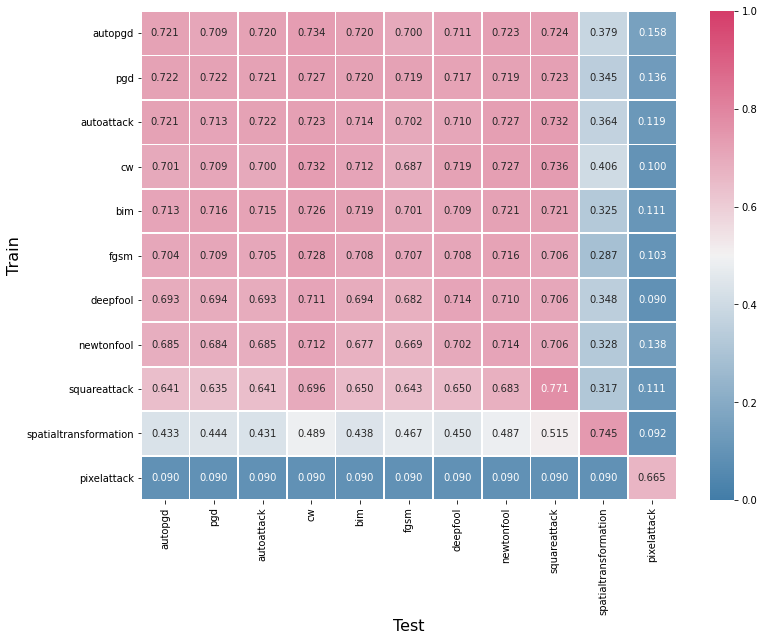

In [93]:
path = "plot/bot-accuracy-validation.png"

# Generate a custom diverging colormap
cmap = sns.diverging_palette(h_neg=240, h_pos=0,s=75, l=50, n=1, as_cmap=True)
plot_heatmap(sorted_acc.drop(columns=["all"]), cmap, path, 0, 1)

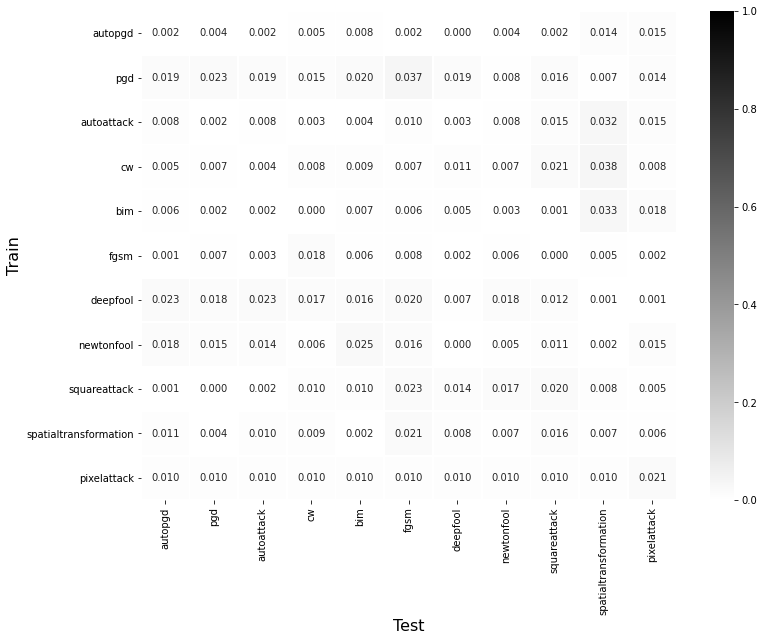

In [94]:
path = "plot/bot-diff-accuracy.png"

# cmap = sns.diverging_palette(h_neg=240, h_pos=0,s=75, l=50, n=1, as_cmap=True)
cmap = "gray_r"
plot_heatmap(abs(diff).drop(columns=["all"]), cmap, path, 0, 1)

In [15]:
# print(sorted_acc.to_latex(bold_rows=True))

In [99]:
accs_transpose, accs = get_accuracies(attacks, None)

In [105]:
cluster = {0: ['autoattack', 'autopgd', 'bim', 'cw', 'fgsm', 'pgd', 'deepfool', 'newtonfool', 'squareattack'], 1: ['pixelattack'], 2: ['spatialtransformation']}
cluster

{0: ['autoattack',
  'autopgd',
  'bim',
  'cw',
  'fgsm',
  'pgd',
  'deepfool',
  'newtonfool',
  'squareattack'],
 1: ['pixelattack'],
 2: ['spatialtransformation']}

In [108]:
attacks

['autoattack',
 'autopgd',
 'bim',
 'cw',
 'fgsm',
 'pgd',
 'deepfool',
 'newtonfool',
 'squareattack',
 'pixelattack',
 'spatialtransformation']

In [111]:
# def measure_inter_similarity(arr) :

def inter_similarity_the_same_train(arr) :
    if len(arr) <= 1 :
        return [0]
    res = []
    for i in range(len(arr)) :
        x1 = arr[i]
        for j in range(i+1, len(arr)) :
            x2 = arr[j]
            if x1 != x2 :
                for train in attacks :
                    val = abs(accs[train][x1] - accs[train][x2])
                    res.append(val)
    return res

def inter_similarity_the_same_test(arr) :
    if len(arr) <= 1 :
        return [0]
    res = []
    for i in range(len(arr)) :
        x1 = arr[i]
        for j in range(i+1, len(arr)) :
            x2 = arr[j]
            if x1 != x2 :
                for test in attacks :
                    val = abs(accs[x1][test] - accs[x2][test])
                    res.append(val)
    return res



In [114]:
len(inter_similarity_the_same_train(cluster[0]))

396

In [116]:
len(inter_similarity_the_same_test(cluster[0]))

396

In [134]:
data = {}
data["inter_similarity_train"] = inter_similarity_the_same_train(cluster[0])
data["inter_similarity_test"] = inter_similarity_the_same_test(cluster[0])

In [135]:
def outer_difference_the_same_train(cluster) :
    res = []
    calculated = set()
    for k1, v1 in cluster.items() :
        for k2, v2 in cluster.items() :
            if k1 != k2 :
                for a1 in v1 : 
                    for a2 in v2 :
                        idx = a1 + "-" + a2
                        if idx not in calculated :
                            for train in attacks :
                                val = abs(accs[train][a1] - accs[train][a2])
                                res.append(val)
        
                                calculated.add(idx)
                                calculated.add(a2 + "-" + a1)
    return res

In [136]:
len(outer_difference_the_same_train(cluster))

209

In [137]:
def outer_difference_the_same_test(cluster) :
    res = []
    calculated = set()
    for k1, v1 in cluster.items() :
        for k2, v2 in cluster.items() :
            if k1 != k2 :
                for a1 in v1 : 
                    for a2 in v2 :
                        idx = a1 + "-" + a2
                        if idx not in calculated :
                            for test in attacks :
                                val = abs(accs[a1][test] - accs[a2][test])
                                res.append(val)
        
                                calculated.add(idx)
                                calculated.add(a2 + "-" + a1)
    return res

In [127]:
len(outer_difference_the_same_test(cluster))

209

In [138]:
data["outer_difference_train"] = outer_difference_the_same_train(cluster)
data["outer_difference_test"] = outer_difference_the_same_test(cluster)

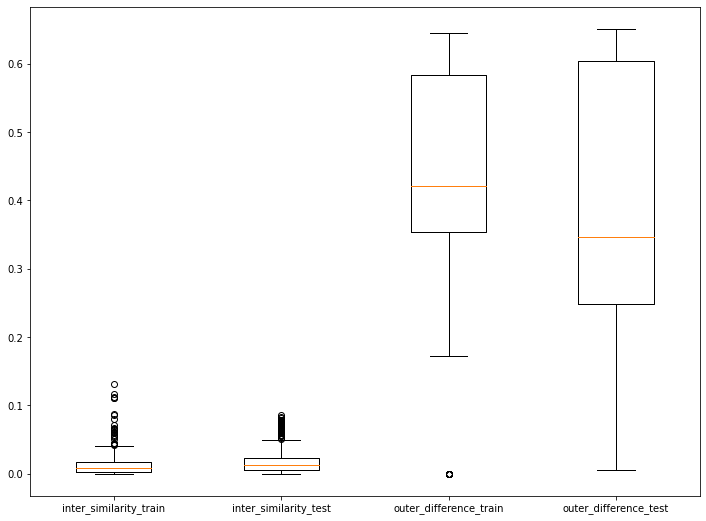

In [147]:
fig, ax = plt.subplots(figsize=(12,9))
ax.boxplot(data.values())
ax.set_xticklabels(data.keys())
fpath = "plot/bot-detail-similarity.png"
fig.savefig(fpath, bbox_inches='tight')